### 1. Problem Statement

### 2. Data Collection
- Dataset Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- Dataset consists of 8 columns and 1000 rows.

##### 2.1 Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##### 2.2 Load Dataset

In [2]:
df = pd.read_csv('./data/StudentsPerformance.csv')

##### 2.3 Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### 2.4 Shape of the Dataset

In [4]:
df.shape

(1000, 8)

### 3. Data Checks To Perform
- Check missing/null values
- Check duplicates
- Check data types
- Check the number of unique value of each column
- Check Statistics of dataset
- Check various categories parent in the different categorical columns

##### 3.1 Check Missing/Null Value

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Observation: There are no missing/null values.

##### 3.2 Check Duplicate Value

In [6]:
df.duplicated().sum()

0

#### Observation: There is no duplicate value.

##### 3.3 Check Data Type

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### Observation: There are 3 numeric and 5 categorical features in the dataset.

##### 3.4 Check Unique Value

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### Observation: There are many unique values in various columns.

##### 3.5 Check Statistics of Dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### 3.6 Exploring Data

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'Gender' variable: ", df['gender'].unique())

print("Categories in 'lunch' variable: ", df['lunch'].unique())

print("Categories in 'race/ethnicity' variable: ", df['race/ethnicity'].unique())

print("Categories in 'test preparation course' variable: ", df['test preparation course'].unique())

print("Categories in 'parental level of education' variable: ", df['parental level of education'].unique())

Categories in 'Gender' variable:  ['female' 'male']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'test preparation course' variable:  ['none' 'completed']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [14]:
# Define numeric and categorical features
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numeric_feature), numeric_feature))
print('We have {} categorical features: {}'.format(len(categorical_feature), categorical_feature))

We have 5 numerical features: ['math score', 'reading score', 'writing score', 'total score', 'average']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


##### 3.7 Adding Total Score and Average Score Columns

In [15]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [17]:
math_full = df[df['math score'] == 100]['average'].count() 
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
math_less_20 = df[df['math score'] <= 20]['average'].count() 
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
reading_less_20 = df[df['reading score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


##### Insights:
- From above we found that students have performed worst in Maths.
- best performance is in reading section.

#### 4. Exploring Data - Visualization 

##### 4.1 Visualize average score
- Histogram
- Kernel Distribution Estimation Plot(KDE)

<AxesSubplot: xlabel='average', ylabel='Count'>

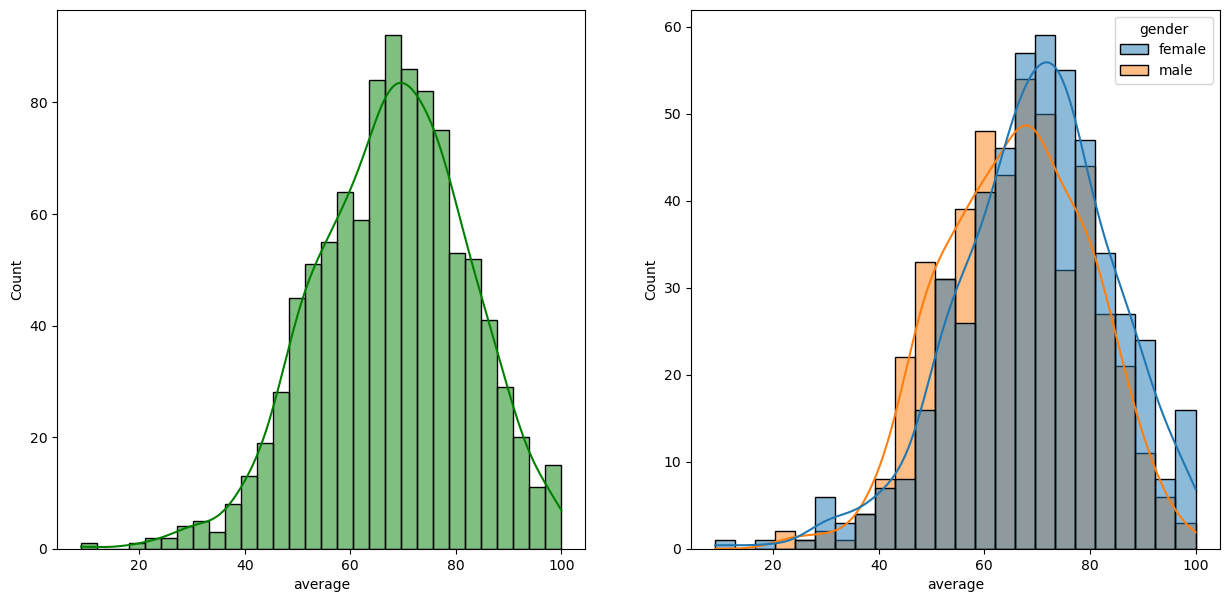

In [24]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')

<AxesSubplot: xlabel='total score', ylabel='Count'>

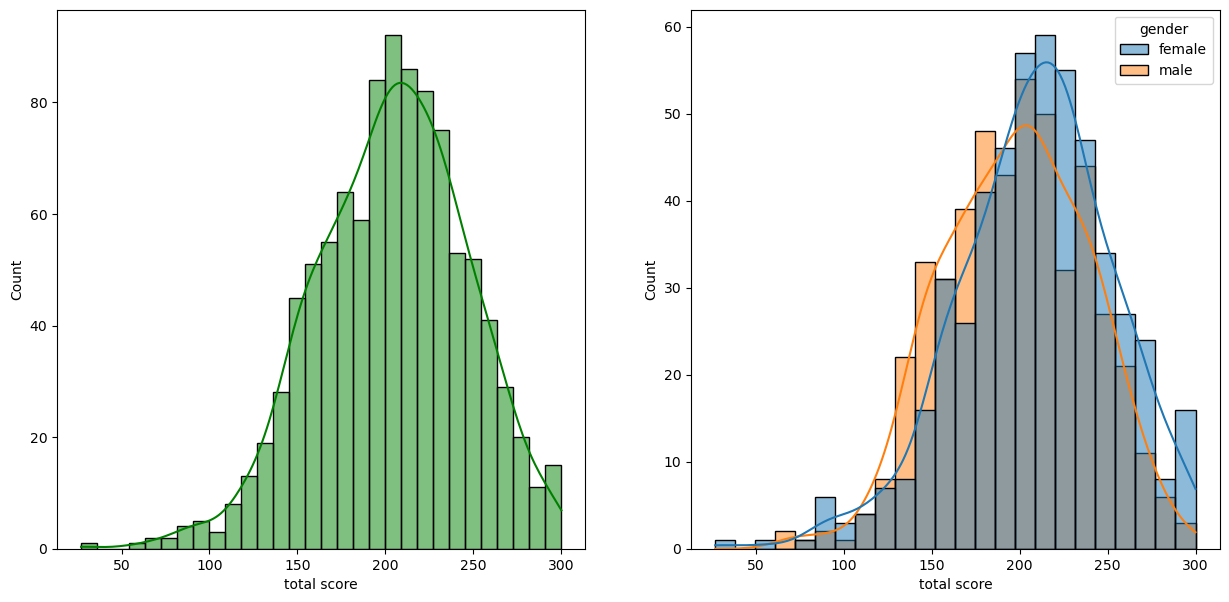

In [32]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', kde=True, bins=30, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')

##### Insights:
- Female students tend to perform well then male students.

<AxesSubplot: xlabel='average', ylabel='Count'>

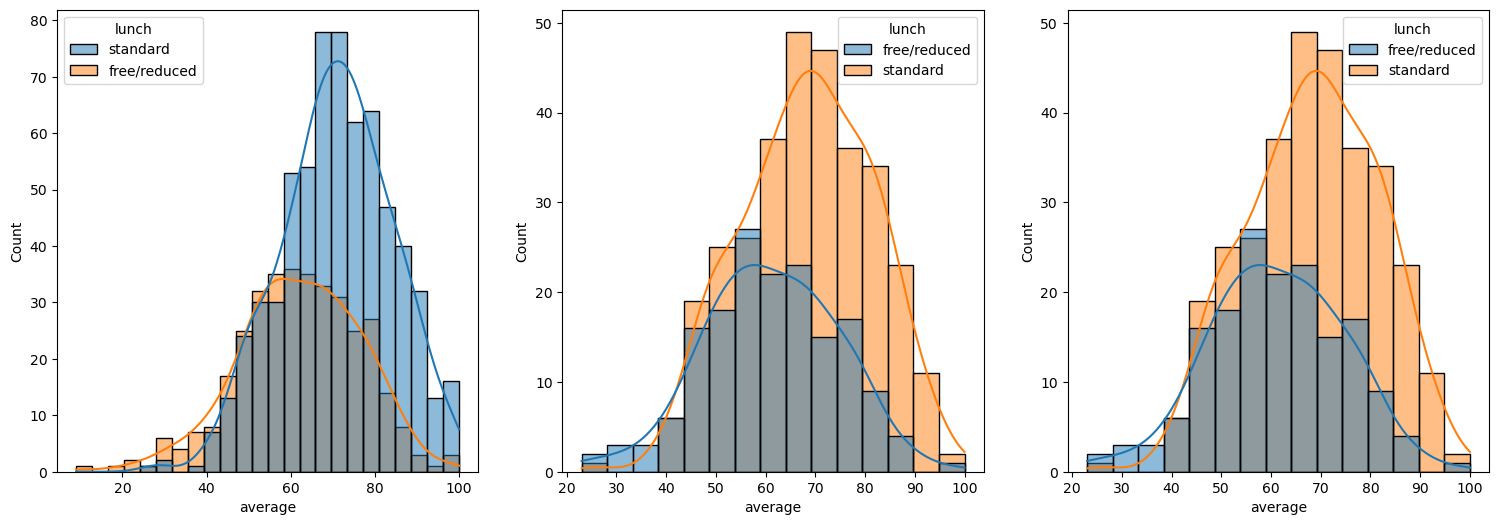

In [42]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')

##### Insights:
- Standard lunch helps perform well in exam.
- Standard lunch helps perform well in exam to be a male or a female. 

<AxesSubplot: xlabel='average', ylabel='Count'>

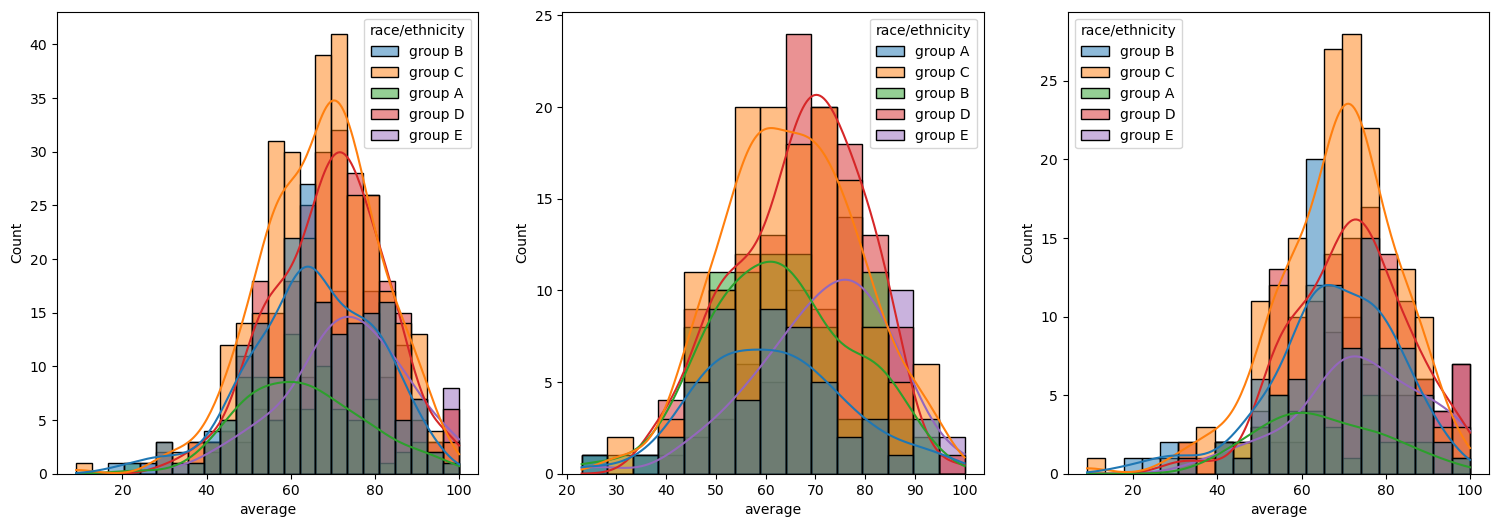

In [47]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='race/ethnicity')

##### Insights:
- Students of group A and E performed poorly in exam.
- Male students from group C and D performed well whereas Female students from group C performed well. 

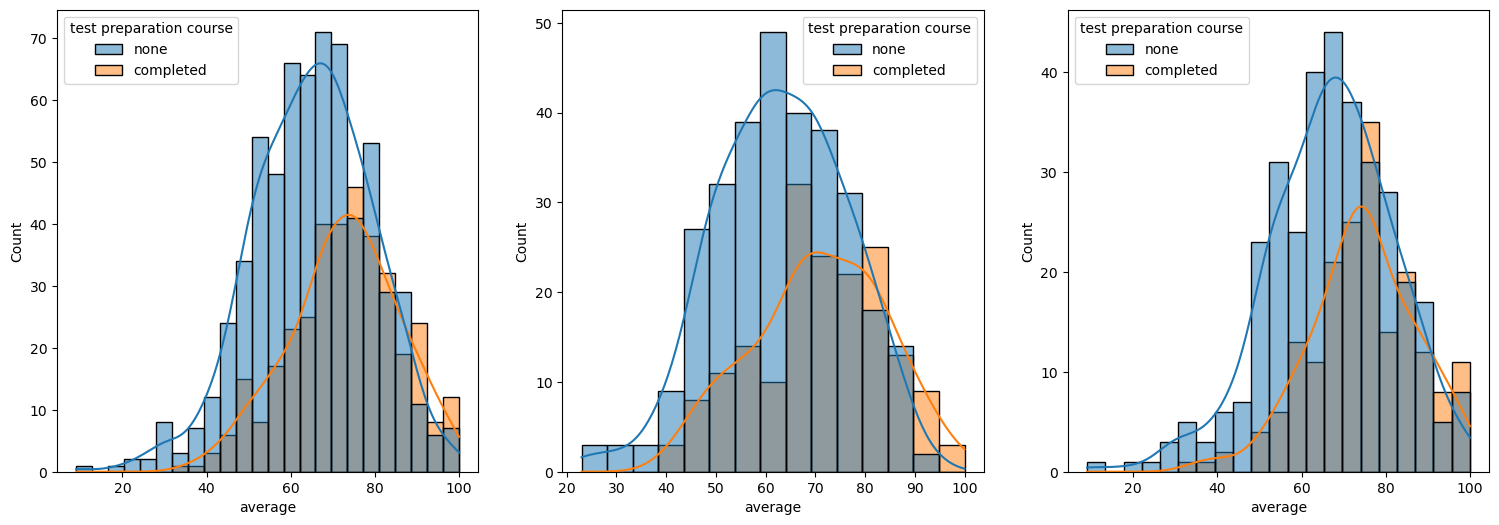

In [48]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='test preparation course')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='test preparation course')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='test preparation course')
plt.show()

##### Insights:
- Students who didn't completed test preparation course - performed well.

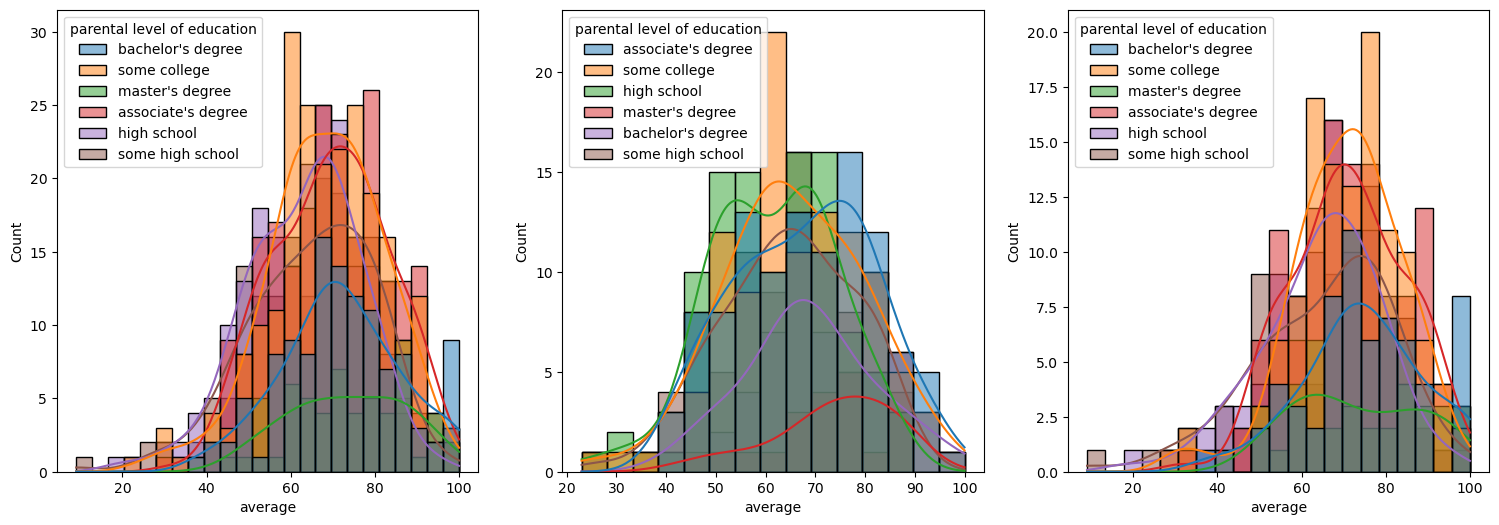

In [49]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.show()

##### Insights:
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
- 3rd plot we can see there is no effect of parent's education on female students.

##### 4.2 Maximumum score of students in all three subjects

<AxesSubplot: title={'center': 'Writing Score'}, ylabel='writing score'>

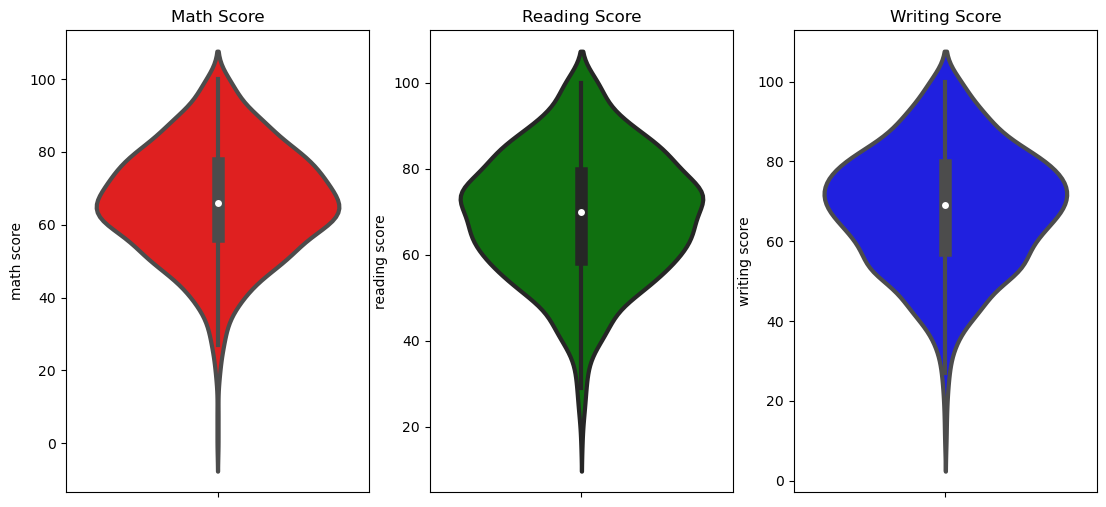

In [56]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.title('Math Score')
sns.violinplot(data=df, y='math score', color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Score')
sns.violinplot(data=df, y='reading score', color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Writing Score')
sns.violinplot(data=df, y='writing score', color='blue', linewidth=3)

##### Insights:
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas most of them score from 50-80 in reading and writing.

##### 4.3 Multivariate Analysis using Pie Plot

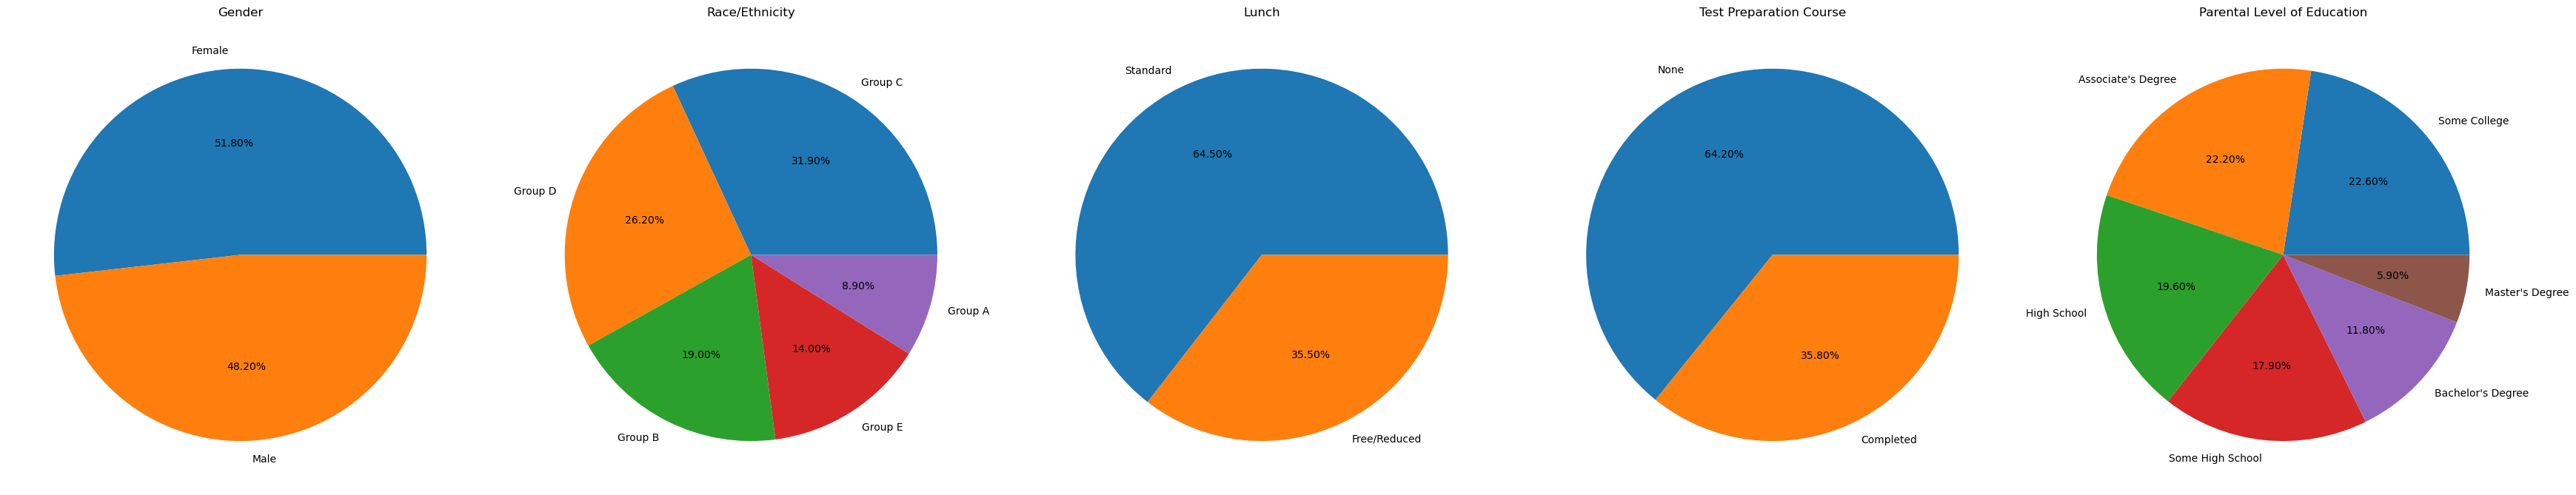

In [98]:
plt.rcParams['figure.figsize'] = (35, 20)

# Gender
size = df['gender'].value_counts()
labels = ['Female', 'Male']

plt.subplot(1, 5, 1)
plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title('Gender')

# Race/Ethnicity
size = df['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']

plt.subplot(1, 5, 2)
plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity')

# Lunch
size = df['lunch'].value_counts()
labels = ['Standard', 'Free/Reduced']

plt.subplot(1, 5, 3)
plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title('Lunch')

# Test Preparation Course
size = df['test preparation course'].value_counts()
labels = ['None', 'Completed']

plt.subplot(1, 5, 4)
plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title('Test Preparation Course')

# Parental Level of Education
size = df['parental level of education'].value_counts()
labels = ["Some College", 
          "Associate's Degree", 
          "High School", 
          "Some High School", 
          "Bachelor's Degree", 
          "Master's Degree"]

plt.subplot(1, 5, 5)
plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title('Parental Level of Education')

plt.tight_layout()
plt.grid()

##### Insights:
- Number of male female students are almost equal.
- Number of students are greatest in Group C.
- Number of students who have standard lunch are greater.
- Number of students who have not enrolled in any test preparation course are greater.
- Number of students are almost equal whose parental education are **Associate's Degree** and **Some College**.

In [92]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

#### 4.4 Feature Wise Analysis

#### 4.4.1 GENDER COLUMN

##### UNIVARIATE ANALYSIS (How is distribution of gender?)

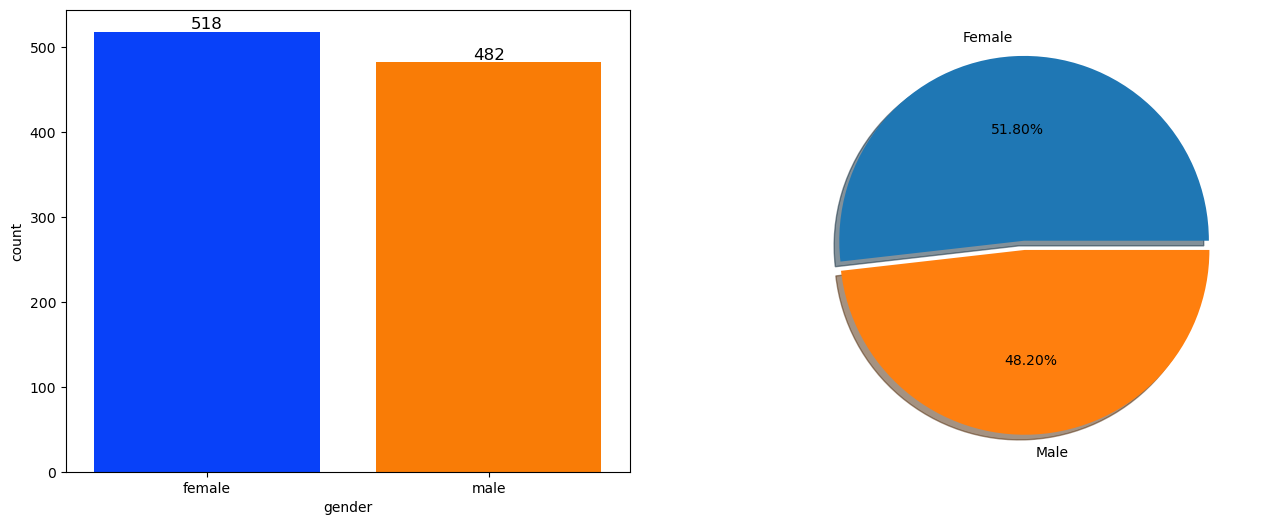

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=df, x='gender', ax=ax[0], saturation=0.95, palette='bright')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

size = df['gender'].value_counts()
labels = ['Female', 'Male']
plt.pie(size, labels=labels, explode=[0, 0.050], autopct='%.2f%%', shadow=True)
plt.show()

##### Insights:
- Gender column has balanced data with 518(51.80%) of female and 482(48.20%) male students.

##### BIVARIATE ANALYSIS (Is gender has any impact on student's performance?)

In [122]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483
